In [2]:
#West Nile Virus Chicago data

#Meghan Aileen Lockard. c March 2020

#Develop a model to when and where different species of mosquitos will test positive for WNV

#import data 1.) location, 2.) weather, 3.) pos/neg testing

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

df_train_rawdata = pd.read_csv("/Users/meghan/Desktop/WestNileVirus/train.csv")
df_weather_rawdata = pd.read_csv("/Users/meghan/Desktop/WestNileVirus/weather.csv")


      Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0           1  2007-05-01    83    50   67     14        51      56    0    2   
1           2  2007-05-01    84    52   68      M        51      57    0    3   
2           1  2007-05-02    59    42   51     -3        42      47   14    0   
3           2  2007-05-02    60    43   52      M        42      47   13    0   
4           1  2007-05-03    66    46   56      2        40      48    9    0   
...       ...         ...   ...   ...  ...    ...       ...     ...  ...  ...   
2939        2  2014-10-29    49    40   45      M        34      42   20    0   
2940        1  2014-10-30    51    32   42     -4        34      40   23    0   
2941        2  2014-10-30    53    37   45      M        35      42   20    0   
2942        1  2014-10-31    47    33   40     -6        25      33   25    0   
2943        2  2014-10-31    49    34   42      M        29      36   23    0   

      ...   CodeSum Depth W

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64


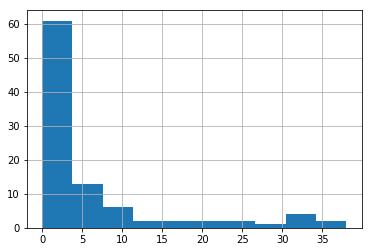

In [3]:
#Wnv cases by trap

dates= df_train_rawdata[['Date']] 
dates1 = dates.rename(columns={'Date': 'Timestamp'})
df_train_rawdata['WnvPresent'].value_counts()

print(df_train_rawdata['Trap'].value_counts())

df_train_rawdata.groupby(['Date'])['WnvPresent'].sum().hist()


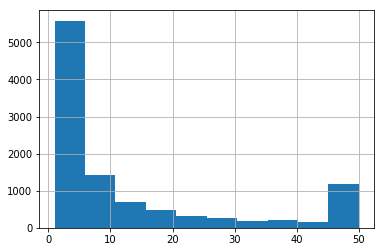

In [4]:
#is the # of mosquitos in the trap informative?
#convert date to a numeric so it can be graphed

df_train_rawdata['Date'] = pd.to_numeric(df_train_rawdata.Date.str.replace('-',''))

df_train_rawdata['Date'].describe

df_train_rawdata['NumMosquitos'].hist()

sum    58688
dtype: int64
sum    236
dtype: int64


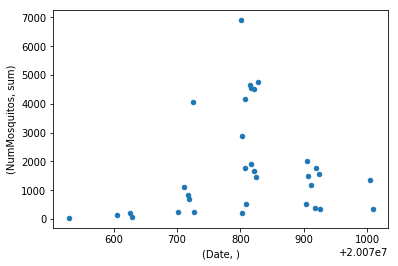

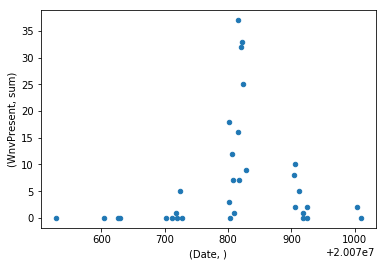

In [5]:
#look at each of the 4 year seasons date vs. number of mosquitos
#2007

df_train_rawdata_2007 = df_train_rawdata[df_train_rawdata['Date']<=20080101]

nummos_count_by_date = pd.DataFrame(df_train_rawdata_2007.groupby(['Date']).agg({'NumMosquitos': ['sum']})).reset_index()
nummos_count_by_date.plot.scatter(x=nummos_count_by_date.columns[0], y=nummos_count_by_date.columns[1])

print(nummos_count_by_date['NumMosquitos'].sum())

wnv_count_by_date = pd.DataFrame(df_train_rawdata_2007.groupby(['Date']).agg({'WnvPresent': ['sum']})).reset_index()
wnv_count_by_date.plot.scatter(x=wnv_count_by_date.columns[0], y=wnv_count_by_date.columns[1])

print(wnv_count_by_date['WnvPresent'].sum())

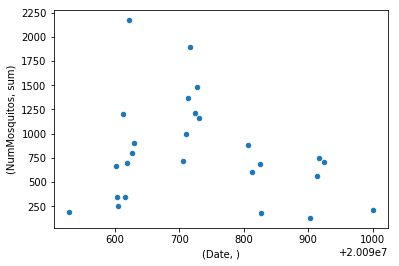

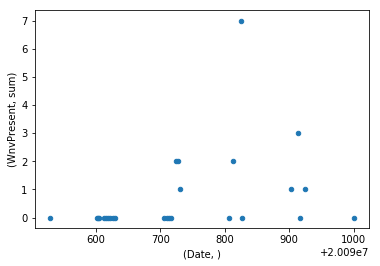

In [6]:
#look at each of the 4 year seasons date vs. number of mosquitos
#2009

df_train_rawdata_2009 = df_train_rawdata[(df_train_rawdata['Date']>=20081221) & (df_train_rawdata['Date']<=20100101)]

nummos_count_by_date = pd.DataFrame(df_train_rawdata_2009.groupby(['Date']).agg({'NumMosquitos': ['sum']})).reset_index()
nummos_count_by_date.plot.scatter(x=nummos_count_by_date.columns[0], y=nummos_count_by_date.columns[1])

wnv_count_by_date = pd.DataFrame(df_train_rawdata_2009.groupby(['Date']).agg({'WnvPresent': ['sum']})).reset_index()
wnv_count_by_date.plot.scatter(x=wnv_count_by_date.columns[0], y=wnv_count_by_date.columns[1])

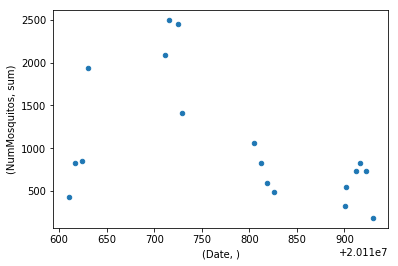

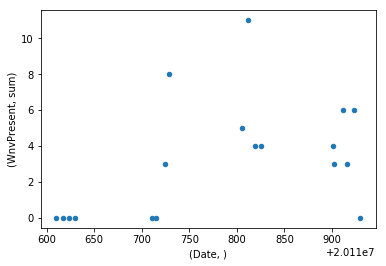

In [7]:
#look at each of the 4 year seasons date vs. number of mosquitos
#2011

df_train_rawdata_2011 = df_train_rawdata[(df_train_rawdata['Date']>=20101221) & (df_train_rawdata['Date']<=20120101)]

nummos_count_by_date = pd.DataFrame(df_train_rawdata_2011.groupby(['Date']).agg({'NumMosquitos': ['sum']})).reset_index()
nummos_count_by_date.plot.scatter(x=nummos_count_by_date.columns[0], y=nummos_count_by_date.columns[1])

wnv_count_by_date = pd.DataFrame(df_train_rawdata_2011.groupby(['Date']).agg({'WnvPresent': ['sum']})).reset_index()
wnv_count_by_date.plot.scatter(x=wnv_count_by_date.columns[0], y=wnv_count_by_date.columns[1])

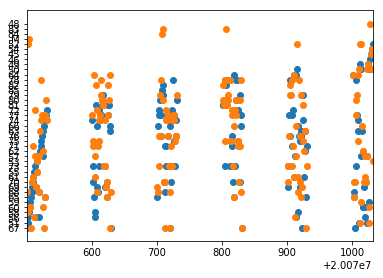

In [8]:
#EDA on weather from two stations

#change date from object to integer

df_weather_rawdata['Date'] = pd.to_numeric(df_weather_rawdata.Date.str.replace('-',''))

# Is the data different enough to warrant some kind of averaging or matching to closest location? 

# make seperate data frames
station1_weather = df_weather_rawdata[df_weather_rawdata['Station']==1]

station2_weather = df_weather_rawdata[df_weather_rawdata['Station']==2]

#compare graphs of relevant features:avg temp

station1_weather_2007 = station1_weather[station1_weather['Date']<=20080101]
station2_weather_2007 = station2_weather[station2_weather['Date']<=20080101]

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['Tavg'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['Tavg'])
axes.set_xlim([20070501, 20071031])
plt.show()

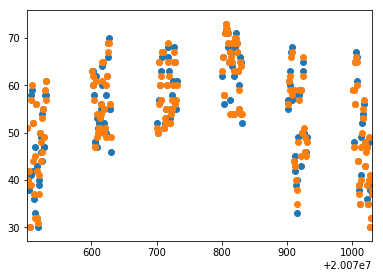

In [9]:
#compare graphs of relevant features: dewpoint

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['DewPoint'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['DewPoint'])
axes.set_xlim([20070501, 20071031])
plt.show()

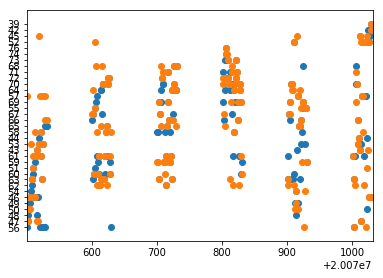

In [10]:
#compare graphs of relevant features: wetbulb

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['WetBulb'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['WetBulb'])
axes.set_xlim([20070501, 20071031])
plt.show()

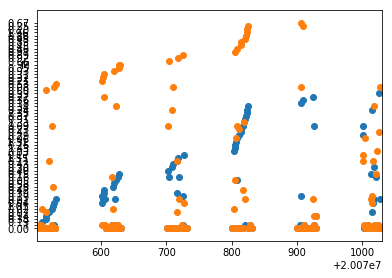

In [11]:
#compare graphs of relevant features:preciptotal

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['PrecipTotal'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['PrecipTotal'])
axes.set_xlim([20070501, 20071031])
plt.show()

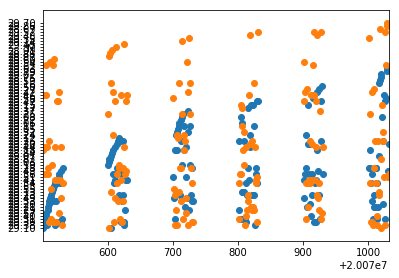

In [12]:
#compare graphs of relevant features: stnPressure

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['StnPressure'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['StnPressure'])
axes.set_xlim([20070501, 20071031])
plt.show()

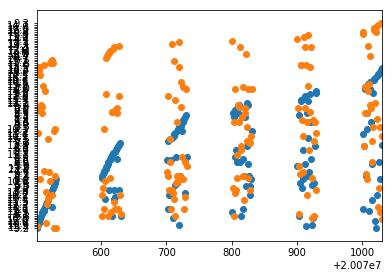

In [13]:
#compare graphs of relevant features: avg speed

a = plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
plt.scatter(x=station1_weather_2007['Date'], y=station1_weather_2007['AvgSpeed'])
plt.scatter(x=station2_weather_2007['Date'], y=station2_weather_2007['AvgSpeed'])
axes.set_xlim([20070501, 20071031])
plt.show()

In [14]:
#use reports just from station 1
#trim down to likely relavent features (avg temp, max, min, dp, wbt, prec.)

station1_relevant = station1_weather[['Date', 'Tavg', 'Tmax', 'Tmin', 'DewPoint', 'WetBulb', 'PrecipTotal']]

#clean "Trace" from precipitation column by replacing with 0
station1_clean = station1_relevant.replace(to_replace='  T', value=0)
station1_clean2 = station1_clean.replace(to_replace='M', value= None )


      Latitude  Longitude  WnvPresent
119  41.974689 -87.890615          66
3    41.673408 -87.599862          41
107  41.954690 -87.800991          18
20   41.726465 -87.585413          16
114  41.964242 -87.757639          14
12   41.704572 -87.565666          11
100  41.944869 -87.832763          11
29   41.743402 -87.731435          11
108  41.957799 -87.930995          10
94   41.923738 -87.785288          10
133  42.008314 -87.777921          10
52   41.798697 -87.736812           9
1    41.659112 -87.538693           9
117  41.973845 -87.805059           9
123  41.986921 -87.689778           9
55   41.801179 -87.679447           8
57   41.803423 -87.642984           8
81   41.899230 -87.716788           8
2    41.662014 -87.724608           8
8    41.688324 -87.676709           8
83   41.904194 -87.756155           7
45   41.776428 -87.627096           7
134  42.009876 -87.807277           7
136  42.011601 -87.811506           7
72   41.868077 -87.666901           7
122  41.9848

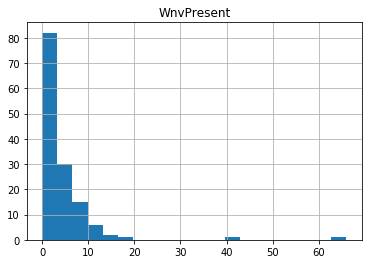

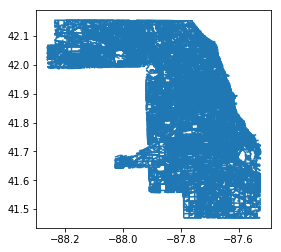

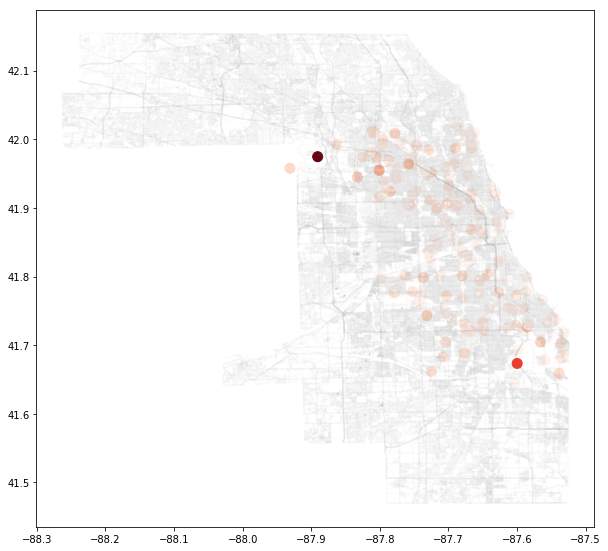

In [58]:
#frequency of finding wnv in same location
location_freq_df = df_train_rawdata[['Latitude', 'Longitude', 'NumMosquitos','WnvPresent']]
grouped = pd.DataFrame(location_freq_df.groupby(['Latitude', 'Longitude'])['WnvPresent'].sum()).reset_index()

grouped.sort_values(['WnvPresent'], ascending=False).hist(['WnvPresent'], bins=20)

print(grouped.sort_values(['WnvPresent'], ascending=False).head(50))

#make colormap plot with location and Wnv incidence counts

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

street_map = gpd.read_file("/Users/meghan/Desktop/tl_2013_17031_roads/tl_2013_17031_roads.shp")

crs= {'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(grouped['Longitude'],grouped['Latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(grouped, crs=crs, geometry=geometry)

fig,ax = plt.subplots(figsize=(10, 10))
street_map.plot(ax=ax, alpha=0.03, color='grey')
geo_df.plot(ax=ax, markersize=100, marker='o', column='WnvPresent', cmap='Reds')
plt.show()

In [90]:
#engineer a feature to reflect the historic wnv hit frequency of each location 
#base on data from 2007-2011, reserve 2013 for test of model 
freq_calc_df = df_train_rawdata[df_train_rawdata['Date']<20130101]
wnt_freq_df = pd.DataFrame(freq_calc_df.groupby(['Latitude', 'Longitude'])['WnvPresent'].sum()).reset_index()

rename = wnt_freq_df.rename(columns={"WnvPresent":"WnvFreq"})

rename['WnvFreqNorm']= rename['WnvFreq'].apply(lambda x: (x/37))


merge_freq_feature = pd.merge(df_train_rawdata, rename[['Latitude', 'Longitude', 'WnvFreqNorm']], how='left', on=['Latitude', 'Longitude'])


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,WnvFreqNorm
0,20070529,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0.270270
1,20070529,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0.270270
2,20070529,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,0.000000
3,20070529,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,0.108108
4,20070529,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,0.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,20130926,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1,0.000000
10502,20130926,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0,0.000000
10503,20130926,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0,0.000000
10504,20130926,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0,0.000000


In [95]:
#clean training data down to relevant features (date, species, lat, long, num mosquitos, wnv+)
df_train_rawdata_relevant = merge_freq_feature[['Date', 'Species', 'NumMosquitos', 'Latitude', 'Longitude', 'WnvFreqNorm', 'WnvPresent']]

df_train_rawdata_relevant

,Date,Species,NumMosquitos,Latitude,Longitude,WnvFreqNorm,WnvPresent
0,20070529,CULEX PIPIENS/RESTUANS,1,41.954690,-87.800991,0.270270,0
1,20070529,CULEX RESTUANS,1,41.954690,-87.800991,0.270270,0
2,20070529,CULEX RESTUANS,1,41.994991,-87.769279,0.000000,0
3,20070529,CULEX PIPIENS/RESTUANS,1,41.974089,-87.824812,0.108108,0
4,20070529,CULEX RESTUANS,4,41.974089,-87.824812,0.108108,0
...,...,...,...,...,...,...,...
10501,20130926,CULEX PIPIENS/RESTUANS,6,41.763733,-87.742302,0.000000,1
10502,20130926,CULEX PIPIENS/RESTUANS,5,41.987280,-87.666066,0.000000,0
10503,20130926,CULEX PIPIENS/RESTUANS,1,41.912563,-87.668055,0.000000,0
10504,20130926,CULEX PIPIENS/RESTUANS,5,42.009876,-87.807277,0.000000,0


In [96]:
#join weather data with training data
weather_and_mosquito = pd.merge(df_train_rawdata_relevant, station1_clean2, how='left', on=['Date'])

#bring back timestamp string
fix_date = pd.concat([weather_and_mosquito, dates1], axis=1)
fix_date

print(fix_date.groupby(['WnvPresent'])['Species'].value_counts())

fix_date_dropspec =fix_date.drop(['Species'], axis=1)

WnvPresent  Species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: Species, dtype: int64


In [98]:
#split the 2013 data away and reserve for testing

data_train = fix_date_dropspec[fix_date_dropspec['Date']<20121231]
data_test = fix_date_dropspec[fix_date_dropspec['Date']>20121231]

#back to timestamp date only
data_train_nodate = data_train.drop(['Date'], axis=1)
data_test_nodate = data_test.drop(['Date'], axis=1)

#convert to day of the year
from datetime import datetime

data_train_nodate['Timestamp']= data_train_nodate['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data_train_nodate['dayofyear']= data_train_nodate['Timestamp'].dt.dayofyear
data_train_clean = data_train_nodate.drop(['Timestamp'], axis=1)


,NumMosquitos,Latitude,Longitude,WnvFreqNorm,WnvPresent,Tavg,Tmax,Tmin,DewPoint,WetBulb,PrecipTotal,dayofyear
0,1,41.954690,-87.800991,0.270270,0,74,88,60,58,65,0.00,149
1,1,41.954690,-87.800991,0.270270,0,74,88,60,58,65,0.00,149
2,1,41.994991,-87.769279,0.000000,0,74,88,60,58,65,0.00,149
3,1,41.974089,-87.824812,0.108108,0,74,88,60,58,65,0.00,149
4,4,41.974089,-87.824812,0.108108,0,74,88,60,58,65,0.00,149
...,...,...,...,...,...,...,...,...,...,...,...,...
8109,3,41.763733,-87.742302,0.000000,0,51,57,45,41,47,0.09,273
8110,2,41.987280,-87.666066,0.000000,0,51,57,45,41,47,0.09,273
8111,2,41.912563,-87.668055,0.000000,0,51,57,45,41,47,0.09,273
8112,2,42.009876,-87.807277,0.000000,0,51,57,45,41,47,0.09,273


In [99]:
#test data as day of the year
data_test_nodate['Timestamp']= data_test_nodate['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data_test_nodate['dayofyear']= data_test_nodate['Timestamp'].dt.dayofyear
data_test_clean = data_test_nodate.drop(['Timestamp'], axis=1)


In [105]:
#drop nan values from data 

data_test_clean1 = data_test_clean.dropna()

,NumMosquitos,Latitude,Longitude,WnvFreqNorm,WnvPresent,Tavg,Tmax,Tmin,DewPoint,WetBulb,PrecipTotal,dayofyear
8114,19,41.954690,-87.800991,0.270270,0,60,68,52,45,52,0,158
8115,2,41.867108,-87.654224,0.054054,0,60,68,52,45,52,0,158
8116,1,41.921965,-87.632085,0.000000,0,60,68,52,45,52,0,158
8117,4,41.720848,-87.666014,0.027027,0,60,68,52,45,52,0,158
8118,4,41.732984,-87.649642,0.054054,0,60,68,52,45,52,0,158
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,6,41.763733,-87.742302,0.000000,1,63,75,50,52,58,0.00,269
10502,5,41.987280,-87.666066,0.000000,0,63,75,50,52,58,0.00,269
10503,1,41.912563,-87.668055,0.000000,0,63,75,50,52,58,0.00,269
10504,5,42.009876,-87.807277,0.000000,0,63,75,50,52,58,0.00,269


0.9611829944547134


/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1560,    0],
       [  63,    0]])

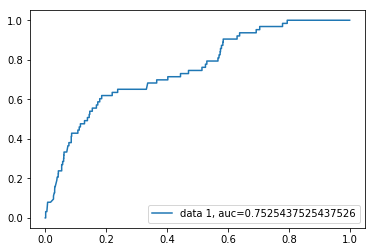

In [101]:
#attempt a logistic regression to begin 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = data_train_clean.drop(['WnvPresent'], axis=1)
y = data_train_clean['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf_train = LogisticRegression().fit(X_train,y_train)

y_pred = clf_train.predict(X_test)

#plot ROC curve
y_pred_proba = clf_train.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

#confusion matrix
score = clf_train.score(X_test, y_test)
print(score)
cfm = metrics.confusion_matrix(y_test, y_pred)
cfm

In [106]:
#grid search hyperparameterization
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

penalty = ['l1', 'l2']
C=[0.0001, 0.001, 0.01, 1, 10, 100, 1000]
class_weight = [{1:0.4, 0:0.6}, {1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)
grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=1)

grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Parameters: ', grid_result.best_params_)

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fitting 3 folds for each of 112 candidates, totalling 336 fits


/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Convergence

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Convergence

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter wa

/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

Best Score:  0.7995387142503543
Best Parameters:  {'C': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  4.1min finished


0.28448275862068967


array([[194, 581],
       [  0,  37]])

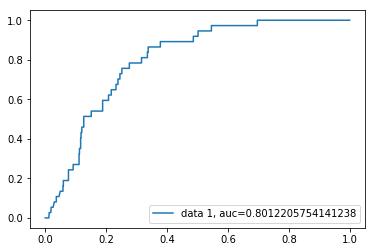

In [111]:
#rerun with best found hyperparameters

X = data_train_clean.drop(['WnvPresent'], axis=1)
y = data_train_clean['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

clf_train2 = LogisticRegression(random_state=0, C=0.001, class_weight={1: 0.99, 0: 0.01}, penalty='l2', solver='liblinear').fit(X_train,y_train)

y_pred = clf_train2.predict(X_test)

#ROC curve
y_pred_proba = clf_train2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

#confusion matrix
score = clf_train2.score(X_test, y_test)
print(score)
cfm = metrics.confusion_matrix(y_test, y_pred)
cfm


0.351555929352397
          0         1         2         3         4         5         6  \
0  0.046685 -0.033699  0.071682  0.000598 -0.001274 -0.018404  0.014103   

          7         8         9        10  
0  0.036569  0.014303 -0.001816  0.024765  


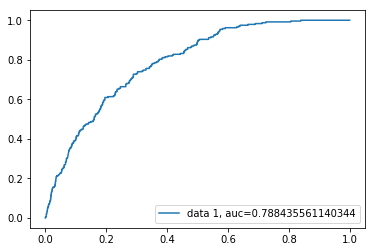

In [147]:
#test the 2013data

features2013= data_test_clean1.drop(['WnvPresent'], axis=1)
predictor2013= data_test_clean1['WnvPresent']

predict2013 = clf_train2.predict(features2013)

#ROC curve
pred_proba_2013 = clf_train2.predict_proba(features2013)[::,1]
fpr, tpr, _ = metrics.roc_curve(predictor2013,  pred_proba_2013)
auc = metrics.roc_auc_score(predictor2013,  pred_proba_2013)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

#confusion matrix
score = clf_train2.score(features2013, predictor2013)
print(score)
cfm = metrics.confusion_matrix(predictor2013, predict2013)
cfm

#feature importance ranking
feature_importance= pd.DataFrame(clf_train2.coef_)
print(feature_importance)

     Latitude  Longitude  WnvPredictProb
62  41.974689 -87.890615      165.213684
56  41.954690 -87.800991       42.958558
43  41.899230 -87.716788       34.608088
2   41.673408 -87.599862       32.131549
4   41.682587 -87.707973       31.777412
69  42.008314 -87.777921       30.994278
10  41.728495 -87.600963       30.510129
0   41.659112 -87.538693       30.183846
67  41.992478 -87.862995       29.151682
49  41.921965 -87.632085       29.060147
14  41.743402 -87.731435       25.159246
21  41.771660 -87.703047       23.970967
66  41.991429 -87.747113       23.125019
13  41.740641 -87.546587       23.085841
38  41.868077 -87.666901       23.069230
11  41.732984 -87.649642       22.750749
48  41.916265 -87.800515       22.351505
70  42.009876 -87.807277       22.286922
55  41.951866 -87.725057       22.266979
50  41.923738 -87.785288       21.987156
37  41.867108 -87.654224       21.809467
28  41.798697 -87.736812       21.737655
1   41.662014 -87.724608       21.610402
6   41.704572 -8

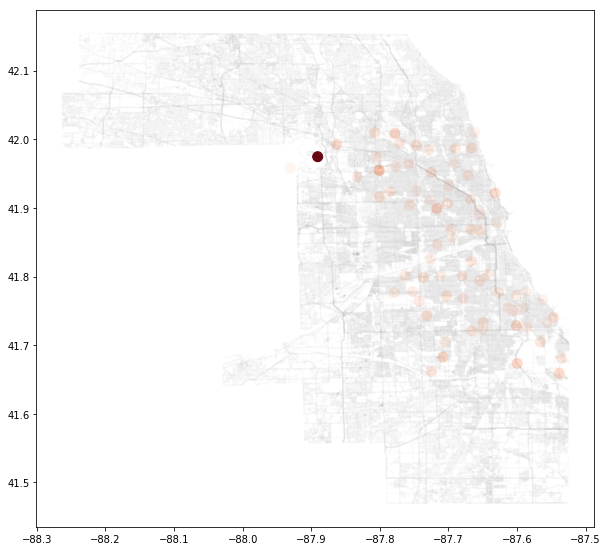

In [140]:
#locate on map probability of locations having Wnv

features2013['WnvPredict']=predict2013
features2013['WnvPredictProb']=pred_proba_2013
prob_location = features2013[['Latitude', 'Longitude', 'WnvPredictProb', ]]

grouped = pd.DataFrame(prob_location.groupby(['Latitude', 'Longitude'])['WnvPredictProb'].sum()).reset_index()

print(grouped.sort_values(['WnvPredictProb'], ascending=False).head(50))

geometry = [Point(xy) for xy in zip(grouped['Longitude'],grouped['Latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(grouped, crs=crs, geometry=geometry)

fig,ax = plt.subplots(figsize=(10, 10))
street_map.plot(ax=ax, alpha=0.03, color='grey')
geo_df.plot(ax=ax, markersize=100, marker='o', column='WnvPredictProb', cmap='Reds')
plt.show()   



     Latitude  Longitude  WnvPredict
56  41.954690 -87.800991          52
43  41.899230 -87.716788          41
10  41.728495 -87.600963          40
4   41.682587 -87.707973          39
2   41.673408 -87.599862          38
0   41.659112 -87.538693          36
69  42.008314 -87.777921          36
67  41.992478 -87.862995          35
49  41.921965 -87.632085          32
14  41.743402 -87.731435          29
21  41.771660 -87.703047          28
13  41.740641 -87.546587          28
38  41.868077 -87.666901          28
55  41.951866 -87.725057          27
11  41.732984 -87.649642          27
1   41.662014 -87.724608          27
66  41.991429 -87.747113          27
48  41.916265 -87.800515          26
28  41.798697 -87.736812          26
6   41.704572 -87.565666          26
7   41.720848 -87.666014          25
50  41.923738 -87.785288          25
60  41.964242 -87.757639          24
39  41.868142 -87.696269          24
24  41.776428 -87.627096          24
27  41.793818 -87.654234          24
1

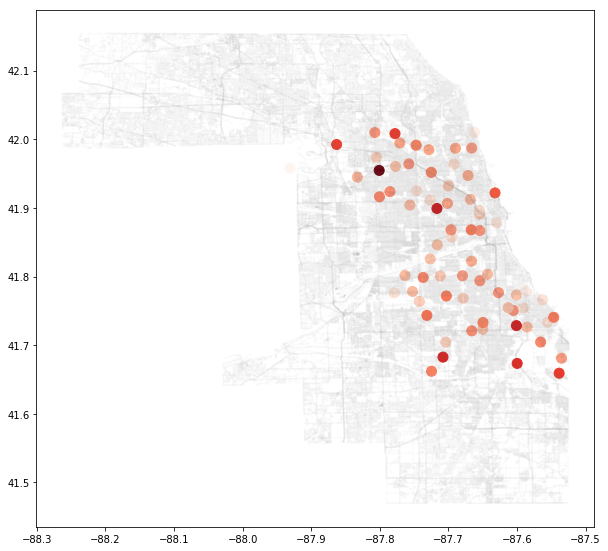

In [141]:
#locate frequency by location predicted

pred_location_freq = features2013[['Latitude', 'Longitude', 'WnvPredict', ]]

grouped = pd.DataFrame(pred_location_freq.groupby(['Latitude', 'Longitude'])['WnvPredict'].sum()).reset_index()

grouped.sort_values(['WnvPredict'], ascending=False)

#take ohare out (clip signal)

grouped_no_ohare = grouped.drop(index = [62], axis=0)

grouped_no_ohare.sort_values(['WnvPredict'], ascending=False)


geometry = [Point(xy) for xy in zip(grouped_no_ohare['Longitude'],grouped_no_ohare['Latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(grouped_no_ohare, crs=crs, geometry=geometry)

fig,ax = plt.subplots(figsize=(10, 10))
street_map.plot(ax=ax, alpha=0.03, color='grey')
geo_df.plot(ax=ax, markersize=100, marker='o', column='WnvPredict', cmap='Reds')
plt.show()

In [218]:
#try a randomforest model 

from sklearn.ensemble import RandomForestClassifier

X = data_train_clean.drop(['WnvPresent'], axis=1)
y = data_train_clean['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


RandomForest_train = RandomForestClassifier().fit(X_train, y_train)
y_pred = RandomForest_train.predict(X_test)

score = RandomForest_train.score(X_test, y_test)
print(score)


cfm = metrics.confusion_matrix(y_test, y_pred)
print(cfm)

from pprint import pprint
pprint(RandomForest_train.get_params())

0.9544054220579175
[[1542   12]
 [  62    7]]
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [216]:
#hyperparameterize for RandomForest

from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

#number of features considered for every split
max_features = ['auto', 'sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)

#min number of samples req. to split a node
min_samples_split = [2,5,10]

#min number of samples req. at each node
min_samples_leaf = [1,2,4]

#method of selecting samples for training each tree 
bootstrap = [True, False]

#class weight
class_weight = [{1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.8, 0:0.2}]

#create a random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'class_weight': class_weight}
pprint(random_grid)

#use random grid to search for best hyperparameters
#base model to tune
rf = RandomForestClassifier()

#search across 100 different combinations, use all available cores
rf_random=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose =2, random_state =42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'bootstrap': [True, False],
 'class_weight': [{0: 0.5, 1: 0.5},
                  {0: 0.4, 1: 0.6},
                  {0: 0.3, 1: 0.7},
                  {0: 0.2, 1: 0.8}],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
/Users/meghan/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.0min finished


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'class_weight': {1: 0.5, 0: 0.5},
 'bootstrap': True}

In [277]:
#rerun with optimized hyperparameters

X = data_train_clean.drop(['WnvPresent'], axis=1)
y = data_train_clean['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


RandomForest_train = RandomForestClassifier(n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features='auto', max_depth=50, class_weight={1: 0.99999, 0: 0.00001}, bootstrap=True).fit(X_train, y_train)
y_pred = RandomForest_train.predict(X_test)

score = RandomForest_train.score(X_test, y_test)
print(score)


cfm = metrics.confusion_matrix(y_test, y_pred)
print(cfm)

from pprint import pprint
pprint(RandomForest_train.get_params())

0.9051139864448552
[[1435  130]
 [  24   34]]
{'bootstrap': True,
 'class_weight': {0: 1e-05, 1: 0.99999},
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


0.8839360807401178


array([[2080,   60],
       [ 216,   22]])

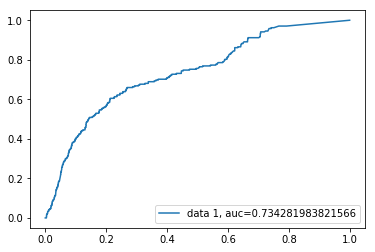

In [278]:
#test the 2013data on Randomforest

features2013= data_test_clean1.drop(['WnvPresent'], axis=1)
predictor2013= data_test_clean1['WnvPresent']

predict2013 = RandomForest_train.predict(features2013)

pred_proba_2013 = RandomForest_train.predict_proba(features2013)[::,1]
fpr, tpr, _ = metrics.roc_curve(predictor2013,  pred_proba_2013)
auc = metrics.roc_auc_score(predictor2013,  pred_proba_2013)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

score = RandomForest_train.score(features2013, predictor2013)
print(score)
cfm = metrics.confusion_matrix(predictor2013, predict2013)
cfm




0.9661121380160197


array([[1564,    2],
       [  53,    4]])

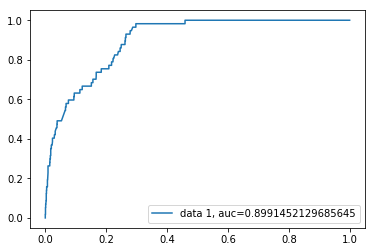

In [127]:
#model with xgboost

import xgboost as xgb

X = data_train_clean.drop(['WnvPresent'], axis=1)
X_DM = X.values

y = data_train_clean['WnvPresent']
y_DM  = y.values

X_train, X_test, y_train, y_test = train_test_split(X_DM, y_DM, test_size=0.20)

xgbmodel = xgb.XGBClassifier().fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)

y_pred_proba = xgbmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

score = xgbmodel.score(X_test, y_test)
print(score)
cfm = metrics.confusion_matrix(y_test, y_pred)
cfm


In [129]:
#hyperparameterization of xgboost model

import warnings
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

X = data_train_clean.drop(['WnvPresent'], axis=1)
X_DM = X.values

y = data_train_clean['WnvPresent']
y_DM  = y.values

X_train, X_test, y_train, y_test = train_test_split(X_DM, y_DM, test_size=0.20)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   25.6s finished



 Time taken: 0 hours 0 minutes and 29.25 seconds.

 All results:
{'mean_fit_time': array([5.0052642 , 5.87032207, 5.3680675 , 4.49201107, 5.90074698]), 'std_fit_time': array([0.01383775, 0.063704  , 0.25001515, 0.16540417, 0.03795211]), 'mean_score_time': array([0.03163028, 0.08210969, 0.08771666, 0.04870598, 0.14587124]), 'std_score_time': array([0.00630959, 0.00225641, 0.0109797 , 0.01043324, 0.0660708 ]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, F

0.7178065311152187


array([[1109,  453],
       [   5,   56]])

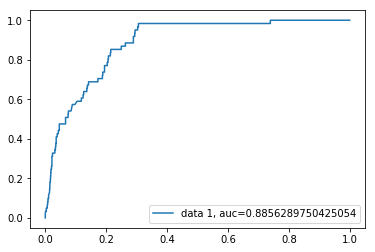

In [132]:
#rerun with hyperparams 

X = data_train_clean.drop(['WnvPresent'], axis=1)
X_DM = X.values

y = data_train_clean['WnvPresent']
y_DM  = y.values

X_train, X_test, y_train, y_test = train_test_split(X_DM, y_DM, test_size=0.20)

xgbmodel = XGBClassifier(booster='dart', subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=0.6, scale_pos_weight=5000).fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)

y_pred_proba = xgbmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

score = xgbmodel.score(X_test, y_test)
print(score)
cfm = metrics.confusion_matrix(y_test, y_pred)
cfm



0.7144659377628259


,0,1
0,f10,319
1,f6,105
2,f1,207
3,f5,60
4,f3,168
5,f0,196
6,f2,137
7,f7,80
8,f4,89
9,f9,85


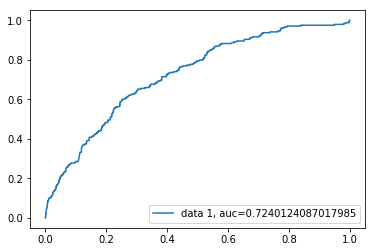

In [154]:
#test on 2013 data

features2013= data_test_clean1.drop(['WnvPresent'], axis=1)
predictor2013= data_test_clean1['WnvPresent']

features_DM =features2013.values
predictors_DM = predictor2013.values

y_pred = xgbmodel.predict(features_DM)

y_pred_proba = xgbmodel.predict_proba(features_DM)[::,1]
fpr, tpr, _ = metrics.roc_curve(predictors_DM,  y_pred_proba)
auc = metrics.roc_auc_score(predictors_DM, y_pred_proba)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

score = xgbmodel.score(features_DM, predictors_DM)
print(score)
cfm = metrics.confusion_matrix(predictors_DM, y_pred)
cfm

#feature importance ranking
pd.DataFrame(list(xgbmodel.get_booster().get_fscore().items()))

     Latitude  Longitude  WnvPredictProb
62  41.974689 -87.890615      126.879509
4   41.682587 -87.707973       25.040981
56  41.954690 -87.800991       24.682966
0   41.659112 -87.538693       24.392660
69  42.008314 -87.777921       23.999134
14  41.743402 -87.731435       22.729691
2   41.673408 -87.599862       21.380577
38  41.868077 -87.666901       17.374557
1   41.662014 -87.724608       16.905273
50  41.923738 -87.785288       16.877125
30  41.801179 -87.679447       16.675694
64  41.986921 -87.689778       16.609901
21  41.771660 -87.703047       15.303338
13  41.740641 -87.546587       15.222616
28  41.798697 -87.736812       15.002901
6   41.704572 -87.565666       14.559505
45  41.906638 -87.701431       14.554964
37  41.867108 -87.654224       14.172769
11  41.732984 -87.649642       13.562727
48  41.916265 -87.800515       13.047387
66  41.991429 -87.747113       12.588903
55  41.951866 -87.725057       12.483421
60  41.964242 -87.757639       12.156928
67  41.992478 -8

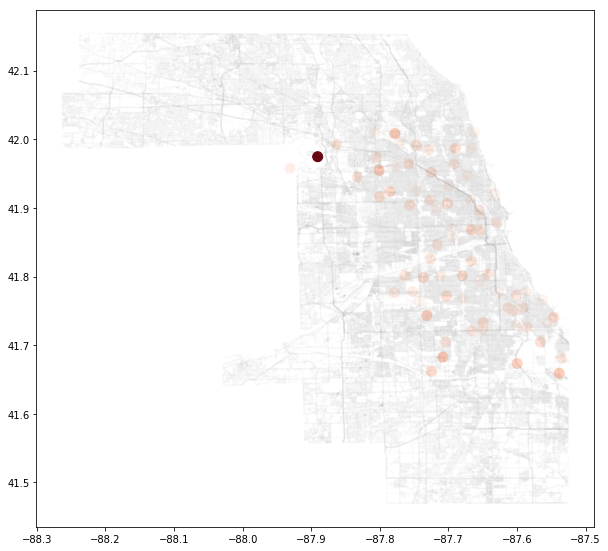

In [142]:
#plot probability by location 

features2013['WnvPredict']=y_pred
features2013['WnvPredictProb']=y_pred_proba
prob_location = features2013[['Latitude', 'Longitude', 'WnvPredictProb', ]]

grouped = pd.DataFrame(prob_location.groupby(['Latitude', 'Longitude'])['WnvPredictProb'].sum()).reset_index()

geometry = [Point(xy) for xy in zip(grouped['Longitude'],grouped['Latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(grouped, crs=crs, geometry=geometry)

fig,ax = plt.subplots(figsize=(10, 10))
street_map.plot(ax=ax, alpha=0.03, color='grey')
geo_df.plot(ax=ax, markersize=100, marker='o', column='WnvPredictProb', cmap='Reds')
plt.show()   

     Latitude  Longitude  WnvPredict
0   41.659112 -87.538693          25
1   41.662014 -87.724608          18
2   41.673408 -87.599862          21
3   41.680946 -87.535198           8
4   41.682587 -87.707973          26
..        ...        ...         ...
67  41.992478 -87.862995          11
68  41.994679 -87.770899           0
69  42.008314 -87.777921          25
70  42.009876 -87.807277           0
71  42.010412 -87.662140           0

[71 rows x 3 columns]


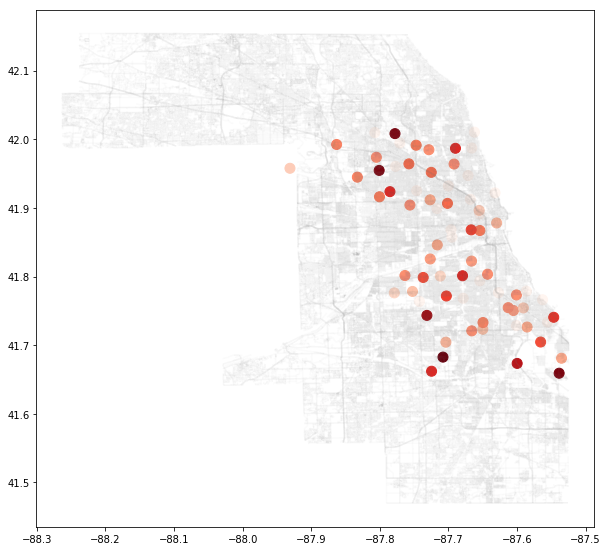

In [136]:
#locate frequency by location predicted

pred_location_freq = features2013[['Latitude', 'Longitude', 'WnvPredict', ]]

grouped = pd.DataFrame(pred_location_freq.groupby(['Latitude', 'Longitude'])['WnvPredict'].sum()).reset_index()

grouped.sort_values(['WnvPredict'], ascending=False)

#clip ohare out
grouped_no_ohare = grouped.drop(index = [62], axis=0)

grouped_no_ohare.sort_values(['WnvPredict'], ascending=False)

print(grouped_no_ohare)

geometry = [Point(xy) for xy in zip(grouped_no_ohare['Longitude'],grouped_no_ohare['Latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(grouped_no_ohare, crs=crs, geometry=geometry)

fig,ax = plt.subplots(figsize=(10, 10))
street_map.plot(ax=ax, alpha=0.03, color='grey')
geo_df.plot(ax=ax, markersize=100, marker='o', column='WnvPredict', cmap='Reds')
plt.show()